1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing

2. Load the dataset

New Dataset after feature engineering

In [2]:
data = pd.read_csv('balanced_water_quality_data.csv')

data.head()

,pH,Turbidity,TDS,Conductivity,Dissolved_Oxygen,COD,BOD,Nitrate,Nitrite,Ammonia,Chlorine_Residual,Lead,Mercury,Arsenic,Cadmium,Coliform_Bacteria,Fluoride,Hardness,TSS,Potability
0,8.01,0.33,317.89,1719.14,10.01,34.39,7.88,39.86,1.36,3.28,0.25,0.0041,0.0008,0.0248,0.0021,0,1.34,215.09,8.13,1
1,7.36,4.28,391.98,1305.76,5.33,12.80,1.29,16.04,0.21,3.89,1.19,0.0029,0.0007,0.0095,0.0087,29,0.14,113.70,144.05,0
2,7.67,0.22,720.70,1143.35,6.64,34.16,12.80,15.55,1.32,0.97,1.63,0.0122,0.0010,0.0334,0.0051,49,1.08,98.33,109.80,0
3,8.01,0.33,317.89,1719.14,10.01,34.39,7.88,39.86,1.36,3.28,0.25,0.0041,0.0008,0.0248,0.0021,0,1.34,215.09,8.13,1
4,8.01,0.33,317.89,1719.14,10.01,34.39,7.88,39.86,1.36,3.28,0.25,0.0041,0.0008,0.0248,0.0021,0,1.34,215.09,8.13,1


3. Clean the data
4. Check for missing values

In [3]:
data.isnull().sum()

pH                   0
Turbidity            0
TDS                  0
Conductivity         0
Dissolved_Oxygen     0
COD                  0
BOD                  0
Nitrate              0
Nitrite              0
Ammonia              0
Chlorine_Residual    0
Lead                 0
Mercury              0
Arsenic              0
Cadmium              0
Coliform_Bacteria    0
Fluoride             0
Hardness             0
TSS                  0
Potability           0
dtype: int64

6. Fill in the missing values
7. Normal Distribution with mean()
8. Skewed distribution with median()

9. Check for missing values again

10. EDA
Correlation

                         pH  Turbidity       TDS  Conductivity  \
pH                 1.000000  -0.338478 -0.279611      0.293061   
Turbidity         -0.338478   1.000000  0.412180     -0.488019   
TDS               -0.279611   0.412180  1.000000     -0.358311   
Conductivity       0.293061  -0.488019 -0.358311      1.000000   
Dissolved_Oxygen   0.133309  -0.272322 -0.205476      0.262083   
COD                0.122490  -0.242190 -0.190737      0.242011   
BOD               -0.033056   0.024605  0.052473     -0.039156   
Nitrate            0.246861  -0.427623 -0.314159      0.389543   
Nitrite           -0.023542   0.103706  0.050400     -0.059587   
Ammonia            0.143986  -0.269966 -0.206487      0.271459   
Chlorine_Residual -0.316265   0.524262  0.411197     -0.487638   
Lead              -0.240094   0.418778  0.334188     -0.380493   
Mercury           -0.103531   0.214095  0.135085     -0.184055   
Arsenic           -0.029082   0.037756  0.007009     -0.030520   
Cadmium   

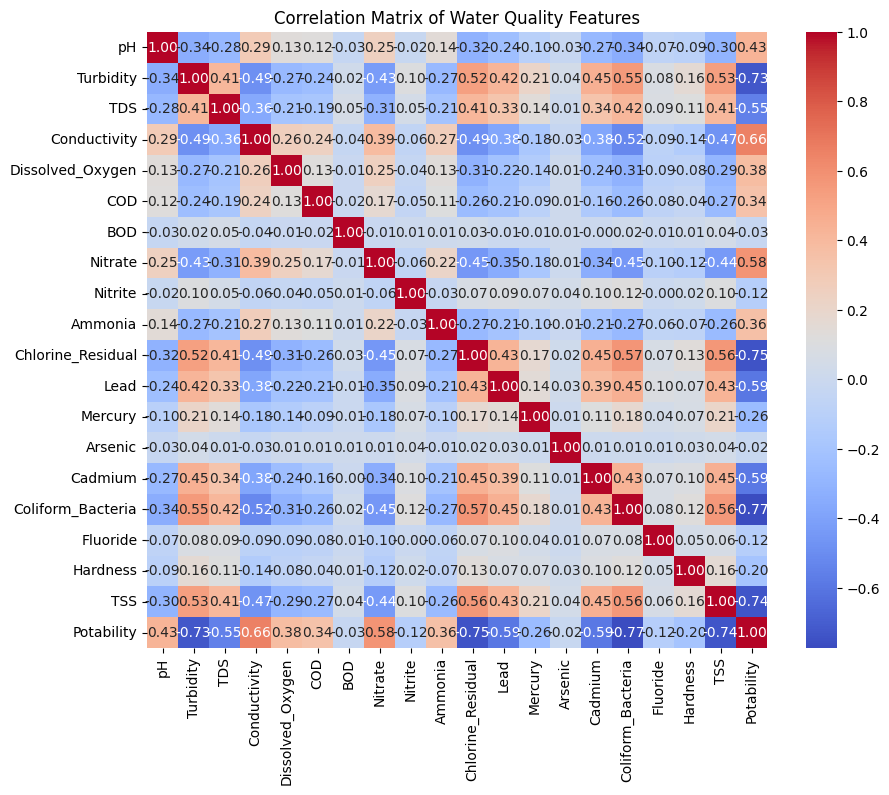

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()
print(correlation_matrix)

print("\nCorrelation with Potability:\n")
print(correlation_matrix['Potability'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Water Quality Features')
plt.show()

In [5]:
data.describe()

,pH,Turbidity,TDS,Conductivity,Dissolved_Oxygen,COD,BOD,Nitrate,Nitrite,Ammonia,Chlorine_Residual,Lead,Mercury,Arsenic,Cadmium,Coliform_Bacteria,Fluoride,Hardness,TSS,Potability
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,7.667964,1.381696,475.119924,1382.883332,8.993310,31.013250,7.957078,32.499560,1.434642,2.889036,1.142002,0.007073,0.000908,0.025007,0.003580,49.822200,1.415362,235.399116,41.684964,0.50000
std,0.795530,1.447642,283.584187,511.620921,2.677136,9.856728,2.841602,12.610303,0.625671,1.084851,1.196677,0.004997,0.000420,0.010271,0.002509,64.405666,0.620069,102.202389,45.410696,0.50005
min,5.500000,0.000000,50.940000,100.190000,2.000000,5.030000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.440000,0.050000,0.00000
25%,7.360000,0.330000,317.890000,1050.690000,7.877500,27.857500,7.880000,25.382500,1.360000,2.480000,0.250000,0.004100,0.000800,0.024800,0.002100,0.000000,1.340000,215.090000,8.130000,0.00000
50%,8.010000,0.330000,317.890000,1719.140000,10.010000,34.390000,7.880000,39.860000,1.360000,3.280000,0.250000,0.004100,0.000800,0.024800,0.002100,0.000000,1.340000,215.090000,8.130000,0.50000
75%,8.010000,2.390000,631.982500,1719.140000,10.010000,34.390000,8.050000,39.860000,1.500000,3.280000,2.050000,0.010125,0.001000,0.025600,0.005200,101.000000,1.520000,257.305000,75.257500,1.00000
max,9.000000,5.000000,1199.650000,1999.600000,13.990000,49.960000,15.000000,49.980000,3.000000,4.990000,3.990000,0.020000,0.002000,0.050000,0.010000,199.000000,2.990000,499.780000,149.940000,1.00000


10. After cleaning, split the dataset but first check the features you have

In [6]:
data.columns

Index(['pH', 'Turbidity', 'TDS', 'Conductivity', 'Dissolved_Oxygen', 'COD',
       'BOD', 'Nitrate', 'Nitrite', 'Ammonia', 'Chlorine_Residual', 'Lead',
       'Mercury', 'Arsenic', 'Cadmium', 'Coliform_Bacteria', 'Fluoride',
       'Hardness', 'TSS', 'Potability'],
      dtype='object')

11. Split the dataset

In [7]:
X = data[['pH', 'Turbidity', 'TDS', 'Conductivity', 'Dissolved_Oxygen', 'COD',
       'BOD', 'Nitrate', 'Nitrite', 'Ammonia', 'Chlorine_Residual', 'Lead',
       'Mercury', 'Arsenic', 'Cadmium', 'Coliform_Bacteria', 'Fluoride',
       'Hardness', 'TSS' ]]
y = data['Potability']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
data.select_dtypes

<bound method DataFrame.select_dtypes of         pH  Turbidity     TDS  Conductivity  Dissolved_Oxygen    COD    BOD  \
0     8.01       0.33  317.89       1719.14             10.01  34.39   7.88   
1     7.36       4.28  391.98       1305.76              5.33  12.80   1.29   
2     7.67       0.22  720.70       1143.35              6.64  34.16  12.80   
3     8.01       0.33  317.89       1719.14             10.01  34.39   7.88   
4     8.01       0.33  317.89       1719.14             10.01  34.39   7.88   
...    ...        ...     ...           ...               ...    ...    ...   
4995  7.26       4.08  139.73       1201.23              4.41  42.27   7.29   
4996  8.01       0.33  317.89       1719.14             10.01  34.39   7.88   
4997  8.18       3.29  946.04       1181.96              6.55  28.97   5.01   
4998  8.77       4.90  624.81       1018.39             13.00  38.01  13.82   
4999  8.01       0.33  317.89       1719.14             10.01  34.39   7.88   

      Nitr

12. Build the model

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

13. Evaluate the model

In [11]:
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)

print("\nClassification Report:\n", class_report)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       524
           1       1.00      1.00      1.00       476

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [13]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print each fold's accuracy score
print("Cross-Validation Accuracy Scores:", cv_scores)

# Print the average accuracy across all folds
print("Average Cross-Validation Accuracy: {:.2f}%".format(cv_scores.mean() * 100))


Cross-Validation Accuracy Scores: [0.999 1.    1.    0.999 1.   ]
Average Cross-Validation Accuracy: 99.96%


New dataframe with most correlated features to potability

In [14]:
data1=data[['pH','Conductivity','Dissolved_Oxygen', 'COD','Nitrate','Ammonia','Potability']]

In [15]:
data1.head()

,pH,Conductivity,Dissolved_Oxygen,COD,Nitrate,Ammonia,Potability
0,8.01,1719.14,10.01,34.39,39.86,3.28,1
1,7.36,1305.76,5.33,12.80,16.04,3.89,0
2,7.67,1143.35,6.64,34.16,15.55,0.97,0
3,8.01,1719.14,10.01,34.39,39.86,3.28,1
4,8.01,1719.14,10.01,34.39,39.86,3.28,1


In [16]:
data1.corr()

,pH,Conductivity,Dissolved_Oxygen,COD,Nitrate,Ammonia,Potability
pH,1.000000,0.293061,0.133309,0.122490,0.246861,0.143986,0.429991
Conductivity,0.293061,1.000000,0.262083,0.242011,0.389543,0.271459,0.657304
Dissolved_Oxygen,0.133309,0.262083,1.000000,0.126189,0.248446,0.128769,0.379806
COD,0.122490,0.242011,0.126189,1.000000,0.171570,0.112722,0.342618
Nitrate,0.246861,0.389543,0.248446,0.171570,1.000000,0.215609,0.583743
Ammonia,0.143986,0.271459,0.128769,0.112722,0.215609,1.000000,0.360421
Potability,0.429991,0.657304,0.379806,0.342618,0.583743,0.360421,1.000000


In [17]:
data1.columns

Index(['pH', 'Conductivity', 'Dissolved_Oxygen', 'COD', 'Nitrate', 'Ammonia',
       'Potability'],
      dtype='object')

In [18]:
X = data1[['pH', 'Conductivity', 'Dissolved_Oxygen', 'COD', 'Nitrate', 'Ammonia']]
y = data1['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)

print("\nClassification Report:\n", class_report)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       524
           1       1.00      1.00      1.00       476

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [22]:
data1.head(30)

,pH,Conductivity,Dissolved_Oxygen,COD,Nitrate,Ammonia,Potability
0,8.01,1719.14,10.01,34.39,39.86,3.28,1
1,7.36,1305.76,5.33,12.80,16.04,3.89,0
2,7.67,1143.35,6.64,34.16,15.55,0.97,0
3,8.01,1719.14,10.01,34.39,39.86,3.28,1
4,8.01,1719.14,10.01,34.39,39.86,3.28,1
5,8.01,1719.14,10.01,34.39,39.86,3.28,1
6,8.01,1719.14,10.01,34.39,39.86,3.28,1
7,8.01,1719.14,10.01,34.39,39.86,3.28,1
8,8.01,1719.14,10.01,34.39,39.86,3.28,1
9,8.01,1719.14,10.01,34.39,39.86,3.28,1


In [23]:
def predict_potability(model, input_data):
    prediction = model.predict(input_data)
    if prediction[0] == 1:
        return "Water is safe for drinking"
    else:
        return "Water is not safe for drinking"
    
    
input_data_list = [
    pd.DataFrame({
        'pH': [8.01],
        'Conductivity': [1719.14],
        'Dissolved_Oxygen': [10.01],
        'COD': [34.39],
        'Nitrate': [39.86],
        'Ammonia': [3.28]               
    }),
    pd.DataFrame({
        'pH': [8.94],
        'Conductivity': [1899.36],
        'Dissolved_Oxygen': [5.76],
        'COD': [25.57],
        'Nitrate': [29.87],
        'Ammonia': [1.43]               
    })
]

for i, input_data in enumerate(input_data_list, 1):
    result = predict_potability(model, input_data)
    print(f"Sample {i}: {result}")


Sample 1: Water is safe for drinking
Sample 2: Water is not safe for drinking


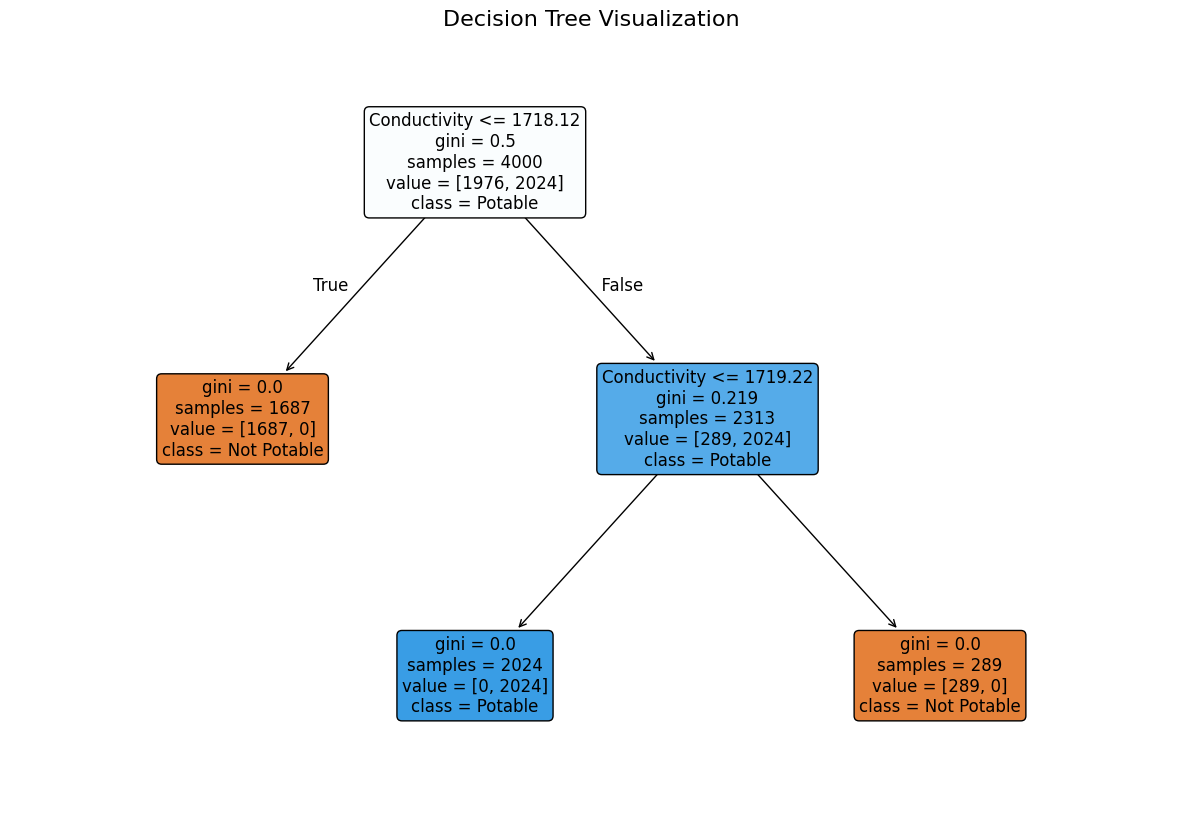

In [26]:
from sklearn.tree import plot_tree


# Example data: Fit the Decision Tree model (you can replace this with your trained model)
# Assuming 'X_train' and 'y_train' are your feature matrix and labels
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, 
          feature_names=X_train.columns,  # Replace with feature names from your dataset
          class_names=["Not Potable", "Potable"],  # Replace with class labels
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()
